# Sampling and Large Numbers
### Stephen Elston
### Data Science 350

## Introduction

Sampling is a fundamental process in the collection of data. Sampling is important because we can almost never look at the whole population. Some key points to keep in mind about sampling are:
- We use inferences on the sample to say something about the population.
- We need estimates of variances on the sample calculations to say something about the population.

Let's look at some examples of sampling.

| Use Case | Sample | Population |
|---|---|---|
| AB Testing | The users we show either web sites A or B | All possible users, past present and future|
|World Cup Socer | 32 teams which qualify in one season | All national times for 4 years|
|Average height of data science students | Students in UW Data Science 350 | All students taking data science classes world wide|

Notice, that in several cases it is not only impractical, but impossible to collect data from the entire population. Hence, we must work with correctly collected samples. 

## Sampling Strategies

We will investigate a number of commonly used sampling strategies: 

- Bernoulli Sampling
- Stratified Sampling
- Cluster Sampling
- Systematic Sampling


### Bernoulli Sampling

Bernoulli sampling has the following properties:

- Every point subjected to a probability of being selected. Simple Random Sample (most common)
- Fixed size Bernoulli sampling.
- Example randomly sample weight of product to ensure quality

Let's look at an example. The code in the cell below creates a data frame with 200 random samples of a Normal distribution, divided into 4 groups. Run this code and examine the summary of the sample. 

In [2]:
# Create and data frame and look at the group size in the sample
data = data.frame(index = 1:200,
                  var1 = rnorm(200),
                  group = sample(1:4, 200, replace=TRUE, prob=c(0.1,0.3,0.4,0.2)))
require(dplyr)
data %>% group_by(group) %>% summarise(n.group = n(), mean.index = mean(var1))

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



group,n.group,mean.index
1,25,0.22051814
2,58,-0.02298395
3,70,0.08679518
4,47,-0.34332449


Next, Bernoulli sample these data by runing the code in the cell below.  

In [3]:
##----Bernoulli Sampling-----
p = 0.1
bernoulli_sample = data[runif(200)<p,] # Yay for R vectorization
bernoulli_sample %>% group_by(group) %>% summarise(n.group = n(), mean.index = mean(var1))

group,n.group,mean.index
1,4,0.26095525
2,3,-0.76171202
3,6,-0.01442748
4,2,-0.02451129


You can see that the total number of samples is only approximately 10%. 

**Your Turn:** You can also use the R `sample` function to Bernoulli sample a data frame. Create the code to Bernoulli sample 15 cases from the population and print the summary statistcs of number and mean by group. **Hint:** the syntax is `my.dataframe[sample(row_numbers, sample_size), ]`.

In [4]:
##----Simple Random Sample-----
size = 15
simple_random_sample = data[sample(1:nrow(data), size),]
simple_random_sample %>% group_by(group) %>% summarise(n.group = n(), mean.index = mean(var1))

group,n.group,mean.index
1,1,-0.2785260
2,3,0.6094433
3,6,0.2522962
4,5,-0.5213052


Notice that for both samples the number of cases for some groups can be rather small. Compare the means by groups of the two samples and the population, and notice how much variation there is. Clearly, Bernoulli sampling is far from idea if the data have a group structure.  

### Stratified Sampling

Stratified sampling strategies are used when data are organized in groups or **Strata**. The idea is simple, sample each group in such a way that the sample includes a representative number of cases from each group. The simplist version of stratified sampling creates a sample with the same number of cases from each group.

Some examples of stratified sampling include:

- Sample equal numbers of men and women.
- Sample equal numbers of people in different income categories.
- Sample the same number of people from towns of different sizes.

Execute the code in the cell below to sample our population uniformly, and verify the result. 

In [5]:
##-----Stratified Sampling for equal numbers -----
n = 5
stratified_sample = data %>% group_by(group) %>% sample_n(n, replace = FALSE)
stratified_sample %>% group_by(group) %>% summarise(n.group = n(), mean.index = mean(var1))

group,n.group,mean.index
1,5,0.1976489
2,5,-0.3917364
3,5,-0.1524798
4,5,-0.2844007


We now have 5 samples from each strata. Notice that the mean estimates of each group are closer those for the population. Stratified sampling ensures the samples for each group are more  representative of the groups. 

### Cluster Sampling

When sampling is expensive a strategyy is required to reduce the cost, yet still keep randomized sampling. Some examples of data which is expensive to collect includues:

- Surveys of customers at a chain of stores.
- Door to door survey of homeowners.

In these cases, the popuation can be divided into clusters and a random selection of clusters sampled. The proceess of cluster sampling follows these steps:

- Define the clusters and divide the data.
- Randomly select some clusters.
- Sample from the selected clusters.
- Optionally, stratify the sample from the clusters.

As an example, you can select a few store locations and Bernoulli sample customers at these locations.

The code in the cell bellow divides a population into clusters, randomly selects 3 clusters and computes and prints some summary statistics. Run this code and examine the results.

In [16]:
##----Cluster Sampling-----
num_clusters = 10
data$cluster_labels = sample(rep(1:num_clusters,each=2*num_clusters))
clusters_sampled = sample(1:10, 3) # Pick three clusters to sample
cluster_sample = data[data$cluster_labels %in% clusters_sampled,]
cluster_sample %>% group_by(cluster_labels) %>% summarise(n.group = n(), mean.index = mean(var1))

cluster_labels,n.group,mean.index
6,20,-0.1823919
7,20,-0.1594086
10,20,0.0687988


You can see the  3 clsuters of 20 cases each which have been selected.

Recalling that the population contians groups the sample from the clusters can be summarized by group by runing the code in the cell below. 

In [17]:
cluster_sample %>% group_by(group) %>% summarise(n.group = n(), mean.index = mean(var1))

group,n.group,mean.index
1,6,-0.82328911
2,18,0.38594711
3,25,-0.06443444
4,11,-0.53240788


**Your Turn:** Sample the clusters by `group` and `cluster_labels`, compute the count and mean for the index, and then sort (`arrange`) by the  `cluster_labels` and `group`. Are the counts in the samples fairly different 

### Systematic Sampling

**WARNING: systmatic sampling is a form of convienience sampling. Convienience sampling almost always leads to problems!**

In systematic sampling every k th case of the population is selected. As you can imagine, this approach is not a random sampling method, but rather a case of convinience sampling. 

The code in the cell bellow systematically samples the population and computes some summary statistics. Run this code and examine the results. 

In [7]:
##------Systematic Sampling-----
k = 5 # 100/5 = 20 observations
sys_sample_even = data[seq(1,nrow(data), by = k),]
sys_sample_even %>% group_by(group) %>% summarise(n.group = n(), mean.index = mean(var1))

group,n.group,mean.index
1,5,-0.26162421
2,12,-0.37764540
3,16,-0.07393356
4,7,-1.02314411


Notice the differing sizes of the sample in each group and the bias in the mean estimates. This illustrates the hazards of convienience sampling. 

### A few more thoughts on sampling

- Whenever you are planing to sample data, make sure you have a clear sampling plan. 
- Know number of clusters, strata, samples in advance.
- Don’t stop sampling when desired result is achieved: e.g. error measure! 
- Note that random sampling, if done properly, controls for database effects, like indexing. 


## Law of large numers

Sample statistics converge to the population statistics as more unbiased experiments are performed.
- For example, the mean of 50 coin flips (0,1)=(T,H) is usually farther away from the true mean of 0.5 than 5,000 coin flips.
- First proof by Jacob Bernoulli in 1713

As an example of convergance of samples, the code in the cell below computes the quantile which converges toward `0` as the sample size increates. Run this code and  examine the results. 

In [19]:
##-----Law of Large Numbers----
##-----Use rolls of dice-------
## set a probability
p_six = 1/6
p_six
xs = c(10, 100, 1000, 10000, 100000)
sizes = c(60, 600, 6000, 60000, 600000)
# roll the dice and find p(x)
Map(function(x,s) dbinom(x = x, size = s, prob=p_six), xs, sizes)

[1] 0.1666667

[[1]]
[1] 0.1370131

[[2]]
[1] 0.04366432

[[3]]
[1] 0.01381858

[[4]]
[1] 0.004370156

[[5]]
[1] 0.001381975

In [10]:
# Probability of within 5%?
# 1) p(7<x<13|60 trails)
pbinom(12, size=60, prob=p_six) - pbinom(7, size=60, prob=p_six)
# alternatively
sum(sapply(8:12, function(x) dbinom(x, size=60, prob=p_six)))

[1] 0.6138631

[1] 0.6138631

In [11]:
# 2) p(70<x<130|600 trails)
pbinom(129, size=600, prob=p_six) - pbinom(70, size=600, prob=p_six)
# alternatively
sum(sapply(71:129, function(x) dbinom(x, size=600, prob=p_six)))

[1] 0.9987466

[1] 0.9987466

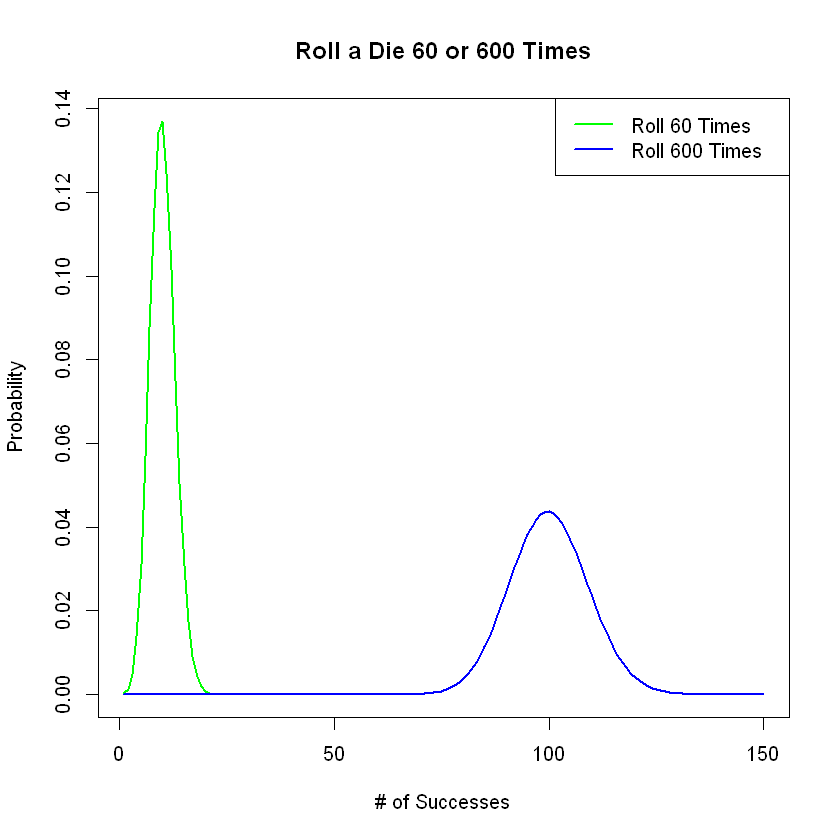

In [12]:
# View Distributions:
x_60 = 1:60
y_60 = dbinom(x_60, size=60, prob=p_six)

x_600 = 1:150
y_600 = dbinom(x_600, size=600, prob=p_six)

plot(x_60, y_60, type='l', main='Roll a Die 60 or 600 Times', xlab="# of Successes",
     ylab="Probability", lwd=2, col="green", xlim=c(1,150))
lines(x_600, y_600, lwd=2, col="blue")
legend("topright", c("Roll 60 Times", "Roll 600 Times"), col=c("green", "blue"),
      lty=c(1,1), lwd=c(2,2))

### Convergancec for a Binomial distribution 

Let's look at the convergance of the estimated probability for a number of flips pf a fair coin. This series should converge to 0.5 as the number of samples increses. Run this code and examine the results.

[1] 0.4999936

[1] 0.5

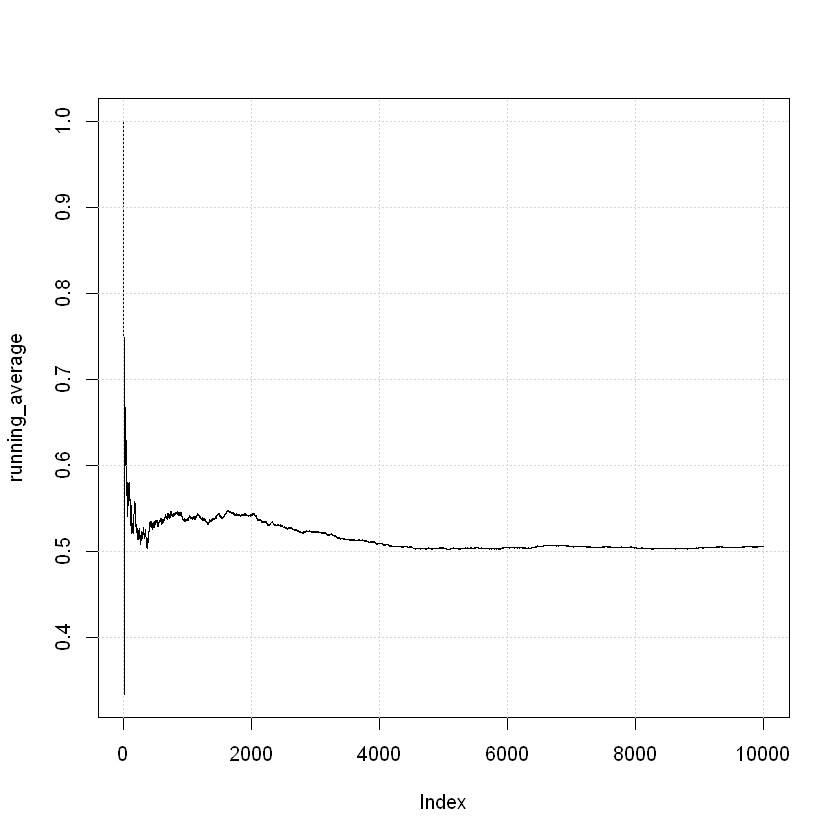

In [13]:
##----Coin Flips-----
# Calculate a running average of N-trials of flipping a fair coin
n = 10000
outcomes = round(runif(n))
running_average = sapply(1:n, function(x) mean(outcomes[1:x]))
plot(running_average, type='l')
grid()

outcomes_sd = sd(outcomes)
outcomes_sd
outcomes_sd_theo = sqrt( 0.5 * (1 - 0.5) )
outcomes_sd_theo

Notice how the runing mean convergest fairly quicky to the expected value of 0.5.

### Convergance for a Normal Distribution

As we sample from a normal distribution, the mean of the sample will converge to the population mean and the sample standard deviation will converge to the population statndard deviation. The standard error of the sample mean should converge as:

$$se = \frac{sd}{\sqrt(n)}$$

Run the code in the cell below to plot the convergance of the sample mean as the number of samples increases.

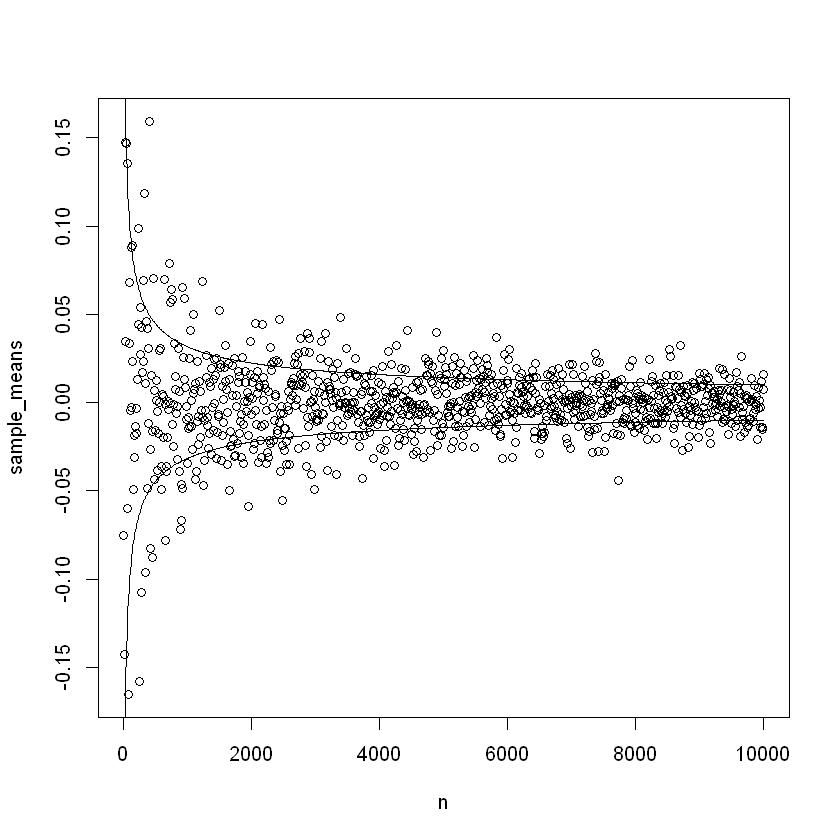

In [14]:
##----St. Dev. vs. St. Error-----
n = seq(10,10000,len=1000)

sample_means = sapply(n, function(x) mean(rnorm(x)))
sample_sds = sapply(n, function(x) sd(rnorm(x)))

plot(n, sample_means) # Plot means
lines(n, 1/sqrt(n))   # Plot means +- st. error
lines(n, -1/sqrt(n))

**Your Turn:** In the cell below create and exectue code to plot the convergance of the sample standard deviation. Try to include lines showing the expected bounds on the standard error. 